In [1]:
!pip install datasets --quiet
from datasets import load_dataset

mnist = load_dataset("mnist")
print(mnist)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


In [2]:
import numpy as np

# Prepare train and test sets
X_train = np.array(mnist["train"]["image"])
y_train = np.array(mnist["train"]["label"])
X_test = np.array(mnist["test"]["image"])
y_test = np.array(mnist["test"]["label"])

# Flatten images: (28,28) -> (784,) and normalize
X_train = X_train.reshape(len(X_train), -1) / 255.0
X_test = X_test.reshape(len(X_test), -1) / 255.0

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (60000, 784)
X_test shape: (10000, 784)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Classification Accuracy: 0.9259


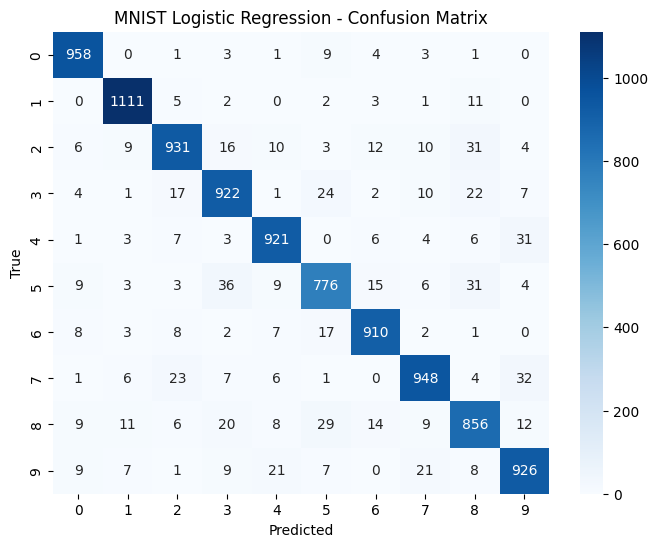

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train Logistic Regression model
clf = LogisticRegression(max_iter=1000, solver="lbfgs", multi_class="multinomial")
clf.fit(X_train, y_train)

# Predict on test data
y_pred = clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Classification Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("MNIST Logistic Regression - Confusion Matrix")
plt.show()
